In [34]:
import numpy as np
import scipy

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [92]:
class Neuron():
    def __init__(self, iin = 0, out = 0, id = None):
        self.x = np.zeros((iin,), dtype=np.float32)
        self.b = np.zeros((out,), dtype=np.float32)
        # A maps the input x to the output b
        self.A      = np.random.random((out,iin)).astype(dtype=np.float32)
        self.inputs = []
        self.id     = id
        self.weights = np.sum(self.A, axis=-1)
    
    def add_input(self):
        #axon = neuron.add_output(neuron)
        #self.inputs.append([axon,neuron])
        self.x.resize( (self.x.shape[0]+1,) )
        self.A.resize( (self.A.shape[0], self.A.shape[1]+1))
        
        self.A[:, -1] = np.random.random((self.A.shape[0],))
    
    def add_output(self):
        self.b.resize( (self.b.shape[0]+1,) )
        self.A.resize( (self.A.shape[0]+1, self.A.shape[1]) )
        self.A[-1, :] = np.random.random((self.A.shape[1],))
        #return self.b.shape[0] - 1
    
    def fire(self):
        # get inputs from neuron n's output channel a
        #for i, (a, n) in enumerate(self.inputs):
        #    self.x[i] = n.b[a]
        # process input
        self.b = np.dot(self.A, self.x)
        self.x.fill(0)
     
class Brain():
    def __init__(self, neurons, connections):
        import networkx as nx
        G = nx.DiGraph()

[0, 1, 0.0]
[1, 2, 0.091962188]
output: 0.0
output: 0.0919622


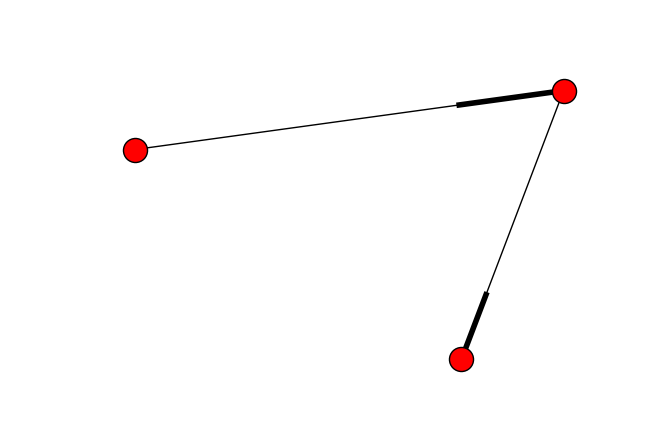

In [94]:
# make a directed graph
#######################
import networkx as nx
G = nx.DiGraph()

# make 3 neurons
G.add_nodes_from([i for i in range(3)])

# connect 0 --> 1
G.add_edge(0, 1)

# connect 1 --> 2
G.add_edge(1, 2)

# make the neurons
##################
neurons = [Neuron(iin = G.in_degree(i), out = G.out_degree(i), id = i) for i in G.nodes()]

# now add the weights
for n in neurons :
    # get successors for node 
    for j, m in enumerate(G.successors(n.id)):
        print([n.id, neurons[m].id, n.weights[j]])
        G.add_weighted_edges_from([(n.id, neurons[m].id, n.weights[j])])

# out input to neuron 0
neurons[0].b[0] = 1.

# Fire away!
for i in range(2):
    # send output
    for n in neurons :
        # get successors for node 
        for j, m in enumerate(G.successors(n.id)):
            # now we need to find out which input node to connect to
            k = np.where(np.array(G.predecessors(neurons[m].id)) == n.id) 
            neurons[m].x[k] = n.b[j]
            
    print('output:', neurons[-1].x[0])
    # process
    for n in neurons :
        n.fire()            

nx.draw(G)

In [91]:
print(G.successors(1))
print(np.where(G.predecessors(2) == 1))

[2]
(array([], dtype=int64),)


output: 0.555116


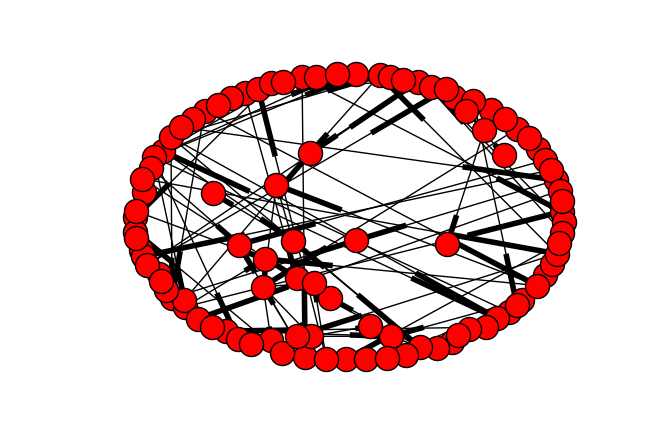

In [103]:
N = 100
C = 10000

# make a directed graph
#######################
import networkx as nx
G = nx.DiGraph()

# make the neurons
G.add_nodes_from([i for i in range(N)])

# make the connections
for i in range(N):
    G.add_edge(np.random.randint(N), np.random.randint(N))

# make sure there is an input neuron
G.add_edge(0, 1)

# make sure there is an output neuron
G.add_edge(N-2, N-1)

# make the neurons
##################
neurons = [Neuron(iin = G.in_degree(i), out = G.out_degree(i), id = i) for i in G.nodes()]

# now add the weights
for n in neurons :
    # get successors for node 
    for j, m in enumerate(G.successors(n.id)):
        #print([n.id, neurons[m].id, n.weights[j]])
        G.add_weighted_edges_from([(n.id, neurons[m].id, n.weights[j])])

# out input to neuron 0
neurons[0].b[0] = 1.

# Fire away!
for i in range(10000):
    # send output
    for n in neurons :
        # get successors for node 
        for j, m in enumerate(G.successors(n.id)):
            # now we need to find out which input node to connect to
            k = np.where(np.array(G.predecessors(neurons[m].id)) == n.id) 
            neurons[m].x[k] = n.b[j]
            
    if neurons[-1].x[0] > 0. :
        print('output:', neurons[-1].x[0])
    # process
    for n in neurons :
        n.fire()            

nx.draw(G)

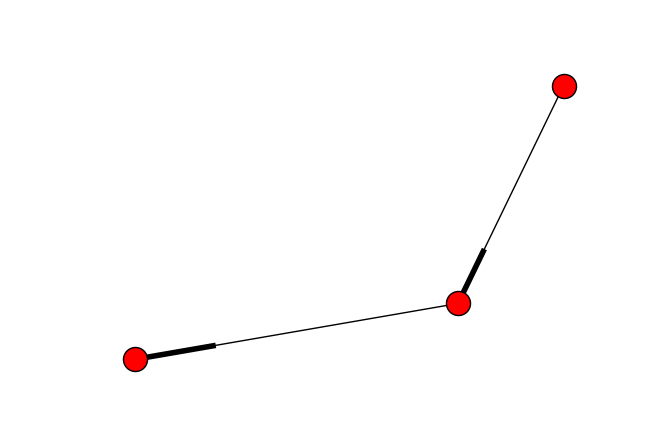

In [53]:
# neurons
N = 10

# connections
C = 4

# neuron inputs (all together)
x = np.zeros(C, dtype=np.float32)

# neuron outputs (all together)
b = np.zeros(C, dtype=np.float32)

# make connections; x = b[M]
M = np.arange(C, dtype=np.uint64)
np.random.shuffle(M) # for now only allow 1-1 connections (the brain can be run in reverse)

# randomly assign inputs and outputs to the neurons
xns = (np.random.random((N-1,))*C).astype(np.int)
xns = np.sort(xns)
i   = np.arange(C) # input connections to be assigned

Nx  = [i[:xns[0]]]
if len(xns) > 1 :
    for j in range(1, len(xns)):
        if xns[j-1] != xns[j]:
            Nx.append(i[xns[j-1] : xns[j]])
Nx.append(i[xns[-1]:])

# randomly assign inputs and outputs to the neurons
bns = (np.random.random((N-1,))*C).astype(np.int)
bns = np.sort(bns)
i   = np.arange(C) # input connections to be assigned

Nb  = [i[:bns[0]]]
if len(bns) > 1 :
    for j in range(1, len(bns)):
        if xns[j-1] != xns[j]:
            Nb.append(i[bns[j-1] : bns[j]])
Nb.append(i[bns[-1]:])

# make linear neuron transforms
from scipy.linalg import block_diag
A = np.array(block_diag(*[np.random.random((len(Nb[i]), len(Nx[i]))) for i in range(N)]))

IndexError: list index out of range

In [51]:
# fire away!!
x.fill(0)
b.fill(0)
x[0] = 1.
print(x)
for t in range(10):
    b = np.dot(A, x)
    x = b[M]
    print(x)

[ 1.  0.  0.  0.]


ValueError: shapes (3,2) and (4,) not aligned: 2 (dim 1) != 4 (dim 0)

In [1]:
import networkx as nx

G = nx.DiGraph()

# figure out which node is what location in xs
Nx_inv = []
Nb_inv = []
for n in range(N):
    #print(n, Nx[n], Nb[n])
    for i in range(len(Nx[n])):
        Nx_inv.append(n)

    for i in range(len(Nb[n])):
        Nb_inv.append(n)

edges = []
for c in range(C):
    edges.append((str(Nb_inv[c]), str(Nx_inv[c]), 1))

for (u, v, w) in edges:
    G.add_edge(u, v, penwidth=w)
    
from IPython.display import Image, SVG, display
nx.nx_pydot.write_dot(G, '/tmp/graph.dot')

import os
os.system('dot -Tpng /tmp/graph.dot > /tmp/graph.png')
display(Image('/tmp/graph.png'))

NameError: name 'N' is not defined